In [30]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# URL de la página de Wikipedia
url = "https://es.wikipedia.org/wiki/Juegos_Panamericanos_de_2023"

# Solicitar la página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Obtener todas las tablas
tables = pd.read_html(response.content)

# Verifica cuántas tablas hay
print(f"Se encontraron {len(tables)} tablas en la página.")

In [ ]:
# Accede a la tabla 6 que es el resultado de medallas
df = tables[6]

# Mostrar las primeras filas para confirmar
print(df.head())

Se encontraron 9 tablas en la página.
   Núm.                  País  Unnamed: 2  Unnamed: 3  Unnamed: 4  Total
0     1  Estados Unidos (USA)         124          75          87    286
1     2          Brasil (BRA)          66          73          66    205
2     3          México (MEX)          52          38          52    142
3     4          Canadá (CAN)          46          55          63    164
4     5            Cuba (CUB)          30          22          17     69


In [26]:
# Limpieza inicial
df.columns = ['Posición', 'País', 'Oro', 'Plata', 'Bronce', 'Total']

# Convierte columnas de medallas a numéricas
for col in ['Oro', 'Plata', 'Bronce', 'Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

   Posición                  País  Oro  Plata  Bronce  Total
0         1  Estados Unidos (USA)  124     75      87    286
1         2          Brasil (BRA)   66     73      66    205
2         3          México (MEX)   52     38      52    142
3         4          Canadá (CAN)   46     55      63    164
4         5            Cuba (CUB)   30     22      17     69


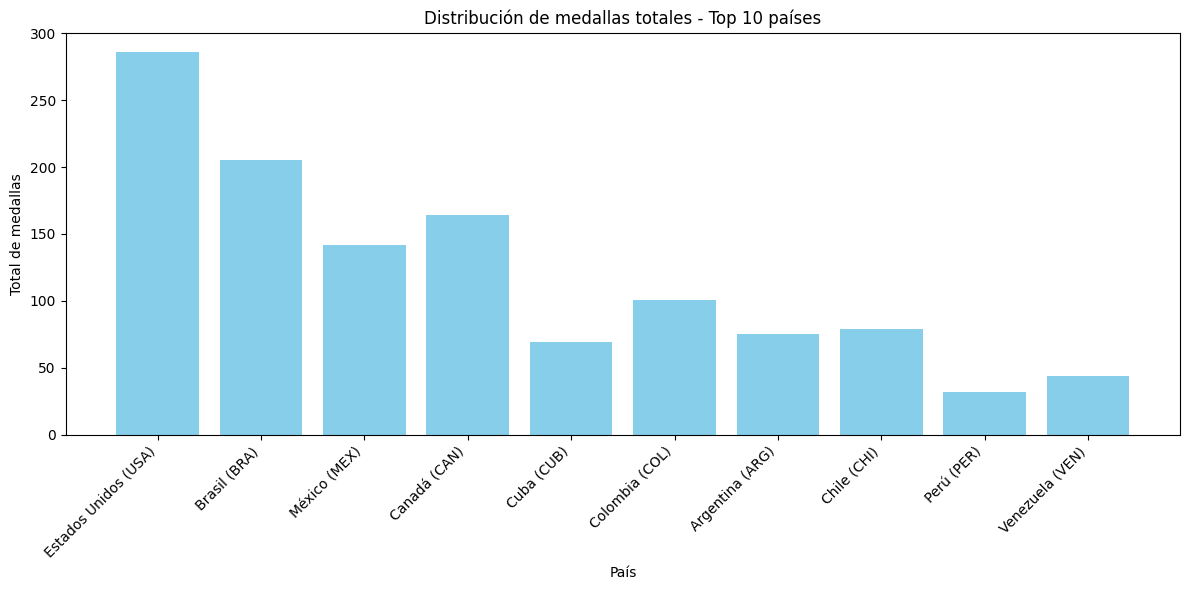

In [35]:
# Gráfico 1: Distribución de medallas totales por los 10 principales países
# Altura es cantidad de medallas y orden son por cantidad de Oros
top_10 = df.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10['País'], top_10['Total'], color='skyblue')
plt.title('Distribución de medallas totales - Top 10 países')
plt.xlabel('País')
plt.ylabel('Total de medallas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Estados Unidos lidera de manera significativa, lo cual refleja su fuerte presencia deportiva y sus recursos dedicados al entrenamiento y desarrollo deportivo.
- Brasil ocupa el segundo lugar, destacándose como el líder en Sudamérica, seguido por México y Canadá, que también tienen programas deportivos sólidos.
- La brecha entre el primer lugar (Estados Unidos) y el segundo (Brasil) muestra la diferencia en infraestructura y apoyo deportivo.

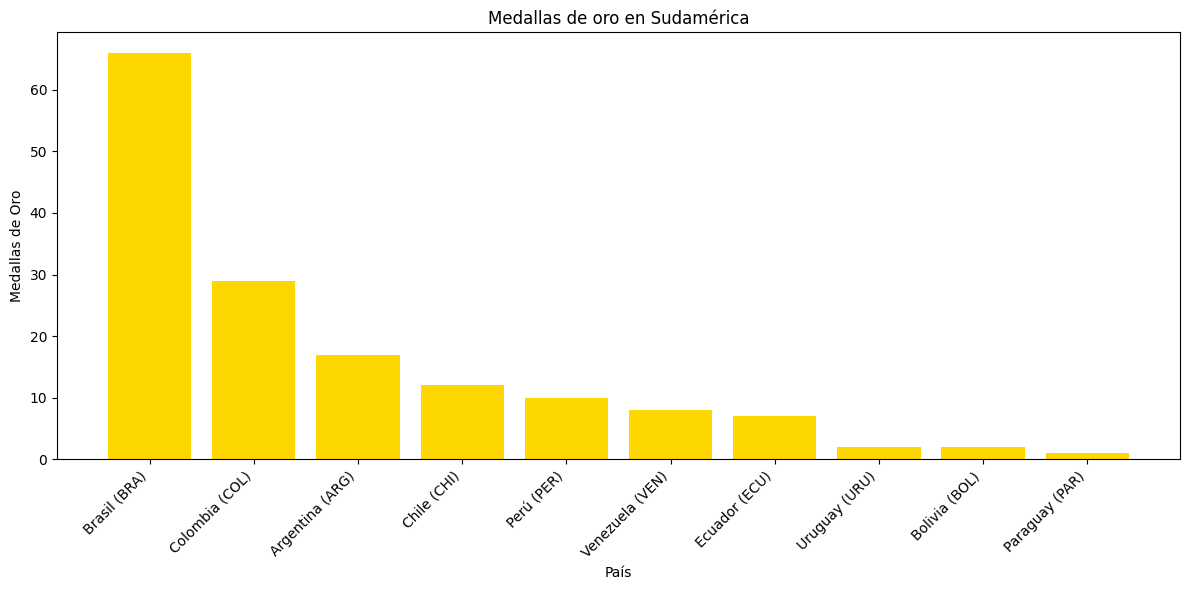

In [32]:
# Gráfico 2: Medallas de oro de los países de Sudamérica
sudamerica = df[df['País'].str.contains('Brasil|Argentina|Chile|Perú|Venezuela|Colombia|Ecuador|Uruguay|Bolivia|Paraguay')]
plt.figure(figsize=(12, 6))
plt.bar(sudamerica['País'], sudamerica['Oro'], color='gold')
plt.title('Medallas de oro en Sudamérica')
plt.xlabel('País')
plt.ylabel('Medallas de Oro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Brasil es el país con mayor cantidad de medallas de oro en Sudamérica, reflejando su inversión en deportes y su población más grande en la región.
- Chile aparece en el ranking, pero su cantidad de medallas de oro está por detrás de países como Colombia y Argentina, lo que sugiere áreas de mejora en disciplinas específicas.
- Los países más pequeños, como Uruguay y Bolivia, tienen un rendimiento menor en términos de medallas de oro, posiblemente debido a limitaciones en recursos y población.

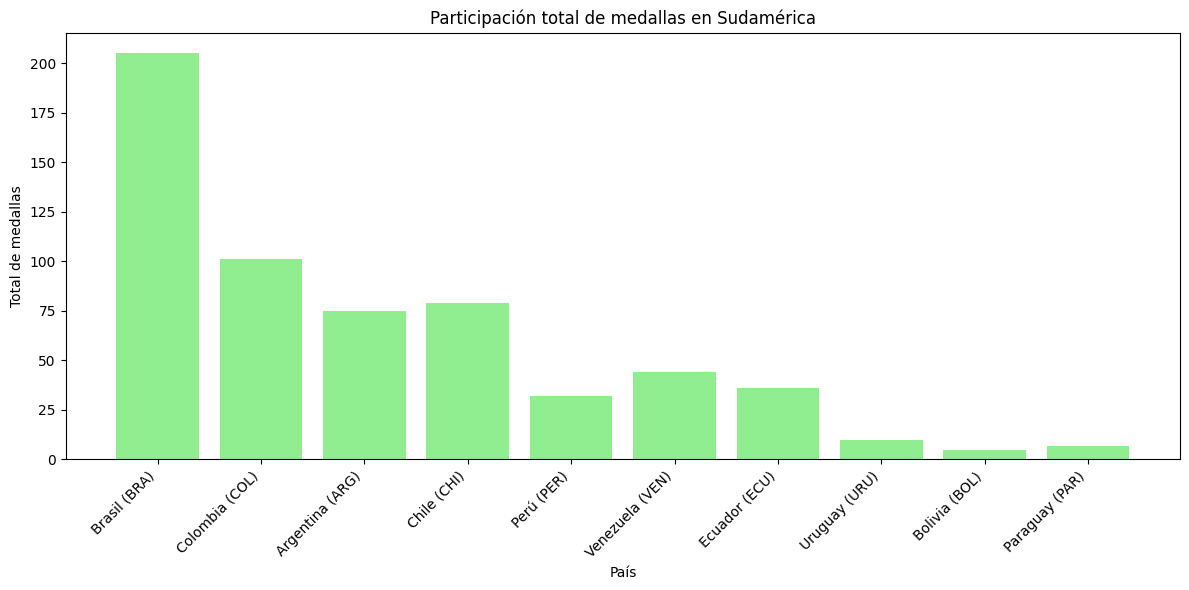

In [33]:
# Gráfico 3: Participación de medallas totales de Chile comparada con otros países sudamericanos
plt.figure(figsize=(12, 6))
plt.bar(sudamerica['País'], sudamerica['Total'], color='lightgreen')
plt.title('Participación total de medallas en Sudamérica')
plt.xlabel('País')
plt.ylabel('Total de medallas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Chile muestra un desempeño sólido en el contexto sudamericano con 79 medallas totales, superando a Argentina en este aspecto.
- El total de medallas de Brasil y Colombia confirma su liderazgo en la región.
- Países como Bolivia y Paraguay tienen participaciones menores, lo que podría estar relacionado con una menor inversión en deportes de alto rendimiento.

In [44]:
# Luego del analisis usamos Plotly para grafico interactivo de las medallas
import plotly.express as px
import nbformat
import plotly.io as pio

In [48]:
# Crear una columna con los códigos ISO
iso_codes = {
    'Estados Unidos (USA)': 'USA', 'Brasil (BRA)': 'BRA', 'México (MEX)': 'MEX', 
    'Canadá (CAN)': 'CAN', 'Cuba (CUB)': 'CUB', 'Colombia (COL)': 'COL', 
    'Argentina (ARG)': 'ARG', 'Chile (CHI)': 'CHL', 'Perú (PER)': 'PER', 
    'Venezuela (VEN)': 'VEN', 'República Dominicana (DOM)': 'DOM', 
    'Ecuador (ECU)': 'ECU', 'Puerto Rico (PUR)': 'PRI', 
    'Equipo de Atletas Independientes (EAI)': 'EAI', 'Uruguay (URU)': 'URY', 
    'Panamá (PAN)': 'PAN', 'Bolivia (BOL)': 'BOL', 'Costa Rica (CRC)': 'CRI', 
    'El Salvador (ESA)': 'SLV', 'Trinidad y Tobago (TTO)': 'TTO', 
    'Paraguay (PAR)': 'PRY', 'Jamaica (JAM)': 'JAM', 'Aruba (ARU)': 'ABW', 
    'Nicaragua (NCA)': 'NIC', 'Bahamas (BAH)': 'BHS', 'Guyana (GUY)': 'GUY', 
    'Haití (HAI)': 'HTI', 'Antigua y Barbuda (ANT)': 'ATG', 
    'Surinam (SUR)': 'SUR', 'Barbados (BAR)': 'BRB', 'Bermudas (BER)': 'BMU', 
    'Dominica (DMA)': 'DMA', 'Honduras (HON)': 'HND', 
    'Islas Vírgenes Británicas (IVB)': 'VGB', 'San Cristóbal y Nieves (SKN)': 'KNA'
}

# Agregar los códigos ISO al df
df['ISO3'] = df['País'].map(iso_codes)

# Crear el mapa coroplético
fig = px.choropleth(
    df,
    locations="ISO3",
    color="Total",  # Intensidad basada en el total de medallas
    hover_name="País",  # Muestra el nombre del país al pasar el mouse
    hover_data={"Oro": True, "Plata": True, "Bronce": True, "Total": True},
    color_continuous_scale="Viridis",  # Escala de colores
    title="Distribución de medallas en los Juegos Panamericanos Santiago 2023",
    labels={"Total": "Medallas Totales"}
)

# Ajustar el diseño
fig.update_geos(showcoastlines=True, showcountries=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

# Configura el renderizador para abrir en navegador
pio.renderers.default = "browser"

# Mostrar el mapa
fig.show()

In [50]:
# Exportamos en HTML para incrustarlo en pagina web
fig.write_html("medallas_panamericanos.html")